# Business Understanding

As YouTube becomes one of the most popular video-sharing platforms, YouTuber is developed as a new type of career in recent decades. YouTubers earn money through advertising revenue from YouTube videos, sponsorships from companies, merchandise sales, and donations from their fans. In order to maintain a stable income, the popularity of videos become the top priority for YouTubers. Meanwhile, some of our friends are YouTubers or channel owners in other video-sharing platforms. This raises our interest in predicting the performance of the video. If creators can have a preliminary prediction and understanding on their videos’ performance, they may adjust their video to gain the most attention from the public.

You have been provided details on videos along with some features as well. Can you accurately predict the number of likes for each video using the set of input variables?


In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score
from collections import Counter
import datetime
import wordcloud
import json

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import LogisticRegression

from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

import warnings
warnings.simplefilter('ignore')

# 1. Brief Look at the Dataset

In [59]:
train = pd.read_csv('data/train.csv')
display(train.head())
display(train.tail())

video_id                                              title  \
0     53364  Alif Allah Aur Insaan Episode 34 HUM TV Drama ...   
1     51040  It's Showtime Miss Q & A: Bela gets jealous of...   
2      1856  ದರ್ಶನ್ ಗೆ ಬಾರಿ ಅವಮಾನ ಮಾಡಿದ ಶಿವಣ್ಣ ನಾಯಕಿ \n  ಕ್...   
3     22618       Havana - swing cover | dodie feat. FLASHBACK   
4     74074  MUMMY NE NI KEHTA - 2  FT. 102 NOT OUT| DUDE S...   

           channel_title  category_id publish_date  \
0                 HUM TV         24.0   2017-12-12   
1  ABS-CBN Entertainment         24.0   2018-03-08   
2     SANDALWOOD REVIEWS         24.0   2018-03-26   
3            doddleoddle         10.0   2018-02-21   
4         Dude Seriously         23.0   2018-05-10   

                                                tags     views  dislikes  \
0  HUM|"TV"|"Alif Allah Aur Insaan"|"Episode 34"|...  351430.0     298.0   
1  ABS-CBN Entertainment|"ABS-CBN"|"ABS-CBN Onlin...  461508.0      74.0   
2  challenging star darshan latest news|"challeng...   40205.0     150.0   
3  havana|"cover"|"a capella"|"swing"|"dodie"|"fl...  509726.0     847.0   
4  dude|"seriously"|"friends"|"fun"|"gujarati"|"h...   74311.0      69.0   

   comment_count                                        description  \
0          900.0  Alif Allah Aur Insaan Episode 34 Full - 12 Dec...   
1          314.0  Vice Ganda notices Bela Padilla's sudden chang...   
2          100.0  ದರ್ಶನ್ ಗೆ ಬಾರಿ ಅವಮಾನ ಮಾಡಿದ ಶಿವಣ್ಣ ನಾಯಕಿ    ಕ್ಲ...   
3         4536.0  Hi hi hi! here's our vid on FLASHBACK's channe...   
4          161.0  BOOK YOUR TICKETS HERE:  https://goo.gl/QxdSyg...   

  country_code    likes  
0           CA   2351.0  
1           CA   3264.0  
2           IN    580.0  
3           GB  82773.0  
4           IN   3557.0

video_id                                              title  \
26056     73469  BURTS BEES GOODNESS GLOWS FOUNDATION WEAR TEST...   
26057     45412  മമ്മൂട്ടിയെ കളിയാക്കിയ ഫെമിനിച്ചികളെ തേച്ചൊട്ട...   
26058     61555  Pyaas | SAJJAN SINGH RANGROOT | DILJIT DOSANJH...   
26059     45134            Eric will do whatever the narrator says   
26060      5968  Live with Dr.Shahid Masood | #ShahidKhaqanAbba...   

       channel_title  category_id publish_date  \
26056   Casey Holmes         26.0   2018-01-16   
26057     First Show         24.0   2017-12-17   
26058  Speed Records         10.0   2018-03-04   
26059          Vat19         24.0   2018-05-17   
26060     NewsOne Pk         25.0   2018-01-16   

                                                    tags      views  dislikes  \
26056  burts bees|"wear test"|"drugstore makeup"|"aff...   103852.0      88.0   
26057  film news|"movie news"|"movie gossips"|"mollyw...    62070.0      53.0   
26058  punjabi songs|"punjabi bhangra"|"punjabi music...  1529753.0    1636.0   
26059  vat19|"vat19 cheesy puffs"|"vat19 cheese balls...   185860.0      91.0   
26060  ShahidMasood|"DrShahidMasood"|"LiveShow"|"Talk...   152299.0     175.0   

       comment_count                                        description  \
26056          856.0  Don't forget to subscribe here-- http://bit.ly...   
26057          219.0  മമ്മൂട്ടിയെ കളിയാക്കിയ ഫെമിനിച്ചികളെ തേച്ചൊട്ട...   
26058         2146.0  VIVID ART HOUSE PRESENTS\n“SAJJAN SINGH RANGRO...   
26059          602.0  Giant stuffed bag of cute plush cheese snacks....   
26060          277.0  NewsONE delivers the Latest Updates, Headlines...   

      country_code    likes  
26056           US   7256.0  
26057           IN   1468.0  
26058           IN  40282.0  
26059           CA   4247.0  
26060           CA   2236.0

In [60]:
test = pd.read_csv("data/test.csv")
display(test.head())

video_id                                              title  \
0     87185  జనవరి 31 గ్రహణం రోజు కొడుకులు ఉన్నవాళ్లు ఏం చే...   
1      9431  ठाणे:'जेव्हा सत्ता बदलेल तेव्हा केस तुमच्यावरह...   
2     40599                           Thank you, Rider Nation!   
3       494  Measuring RPM with a spectrum analyzer mobile app   
4     73942  Anchor Anasuya responded on Phone breaking iss...   

              channel_title  category_id publish_date  \
0     CHIRRAVURI FOUNDATION         22.0   2018-01-17   
1           VIRAL IN  INDIA         22.0   2017-11-18   
2  Saskatchewan Roughriders         17.0   2017-12-01   
3           Matthias Wandel         26.0   2018-02-06   
4     AVA Creative thoughts         22.0   2018-02-06   

                                                tags     views  dislikes  \
0  Chirravuri|"Foundation"|"chirravuri foundation...   80793.0      54.0   
1  Raj Thackeray|"LIVE SPEECH"|"latest Speech"|"r...  150317.0     230.0   
2  Roughriders|"Riders"|"CFL"|"Regina"|"Saskatche...    6558.0      10.0   
3  rpm|"woodworking"|"tool speed"|"blade speed"|"...   89664.0     145.0   
4  anasuya responded|"anasuya issue"|"anasuya bor...   53526.0     357.0   

   comment_count                                        description  \
0           79.0  8885569579...CHIRRAVURI FOUNDATION.\n\n☛Subsct...   
1          311.0  Don't Forget to SUBSCIRBE to our YouTube Chann...   
2            7.0  “To the devoted, the impassioned, the loyal:\n...   
3          324.0  Using a spectrum analyzer app to analyze the s...   
4          153.0  Welcome to AVA Creative thoughts Channel Subsc...   

  country_code  
0           IN  
1           IN  
2           CA  
3           US  
4           IN

In [61]:
train['source'] = 'train'
test['source'] = 'test'
data = pd.concat([train, test], axis=0).reset_index()
data

index  video_id                                              title  \
0          0     53364  Alif Allah Aur Insaan Episode 34 HUM TV Drama ...   
1          1     51040  It's Showtime Miss Q & A: Bela gets jealous of...   
2          2      1856  ದರ್ಶನ್ ಗೆ ಬಾರಿ ಅವಮಾನ ಮಾಡಿದ ಶಿವಣ್ಣ ನಾಯಕಿ \n  ಕ್...   
3          3     22618       Havana - swing cover | dodie feat. FLASHBACK   
4          4     74074  MUMMY NE NI KEHTA - 2  FT. 102 NOT OUT| DUDE S...   
...      ...       ...                                                ...   
37226  11165     19415  Tapu Sena's Summer Vacation | Tapu Sena Specia...   
37227  11166     25168        Senselet Drama S02 EP43 ሰንሰለት ምዕራፍ 2 ክፍል 43   
37228  11167     80293           Being Woman | Girl Formula | Chai Bisket   
37229  11168     80880                  Deivamagal Episode 1455, 05/02/18   
37230  11169      6514  They Are Doing Things That Should Truly Scare You   

               channel_title  category_id publish_date  \
0                     HUM TV         24.0   2017-12-12   
1      ABS-CBN Entertainment         24.0   2018-03-08   
2         SANDALWOOD REVIEWS         24.0   2018-03-26   
3                doddleoddle         10.0   2018-02-21   
4             Dude Seriously         23.0   2018-05-10   
...                      ...          ...          ...   
37226                 SAB TV         24.0   2018-03-30   
37227         Senselet Drama          1.0   2018-04-28   
37228           Girl Formula         24.0   2018-03-08   
37229              VikatanTV         43.0   2018-02-05   
37230                 Amplex         24.0   2018-03-08   

                                                    tags      views  dislikes  \
0      HUM|"TV"|"Alif Allah Aur Insaan"|"Episode 34"|...   351430.0     298.0   
1      ABS-CBN Entertainment|"ABS-CBN"|"ABS-CBN Onlin...   461508.0      74.0   
2      challenging star darshan latest news|"challeng...    40205.0     150.0   
3      havana|"cover"|"a capella"|"swing"|"dodie"|"fl...   509726.0     847.0   
4      dude|"seriously"|"friends"|"fun"|"gujarati"|"h...    74311.0      69.0   
...                                                  ...        ...       ...   
37226  tapu sena special|"tapu special clips"|"taarak...   293258.0     280.0   
37227  Senselet|"Senselet part 43"|"senselet 43"|"Zem...   148547.0     116.0   
37228  girl formula|"short film"|"telugu"|"telugu fun...   138256.0     150.0   
37229  deivamagal|"deiva magal"|"deiva magal serial"|...  1024050.0    3212.0   
37230  educational|"secrets"|"hidden"|"truth"|"myster...   148070.0     188.0   

       comment_count                                        description  \
0              900.0  Alif Allah Aur Insaan Episode 34 Full - 12 Dec...   
1              314.0  Vice Ganda notices Bela Padilla's sudden chang...   
2              100.0  ದರ್ಶನ್ ಗೆ ಬಾರಿ ಅವಮಾನ ಮಾಡಿದ ಶಿವಣ್ಣ ನಾಯಕಿ    ಕ್ಲ...   
3             4536.0  Hi hi hi! here's our vid on FLASHBACK's channe...   
4              161.0  BOOK YOUR TICKETS HERE:  https://goo.gl/QxdSyg...   
...              ...                                                ...   
37226          123.0  Click here to Subscribe to SAB TV Channel : ht...   
37227          863.0  ድርሰት: ተመስገን አፈወርቅ\nአዘጋጆች: ቴዎድሮስ ለገሰ ብዙ እና ተመስገ...   
37228         1539.0  Don't put her on a pedestal. Don't shame her f...   
37229         1075.0  Deivamagal Episode 1455\nSubscribe: https://go...   
37230          935.0  ➨Check Out our Online Store: https://amplex-li...   

      country_code    likes source  
0               CA   2351.0  train  
1               CA   3264.0  train  
2               IN    580.0  train  
3               GB  82773.0  train  
4               IN   3557.0  train  
...            ...      ...    ...  
37226           IN      NaN   test  
37227           CA      NaN   test  
37228           IN      NaN   test  
37229           IN      NaN   test  
37230           CA      NaN   test  

[37231 rows x 14 columns]

# 2. Shape of the Dataset

In [62]:
print("Number of Rows in train: ", train.shape[0])
print("Number of Columns in train: ", train.shape[1])

print("Number of Rows in test: ", test.shape[0])
print("Number of Columns in test: ", test.shape[1])

Number of Rows in train:  26061
Number of Columns in train:  13
Number of Rows in test:  11170
Number of Columns in test:  12


# Data Understanding

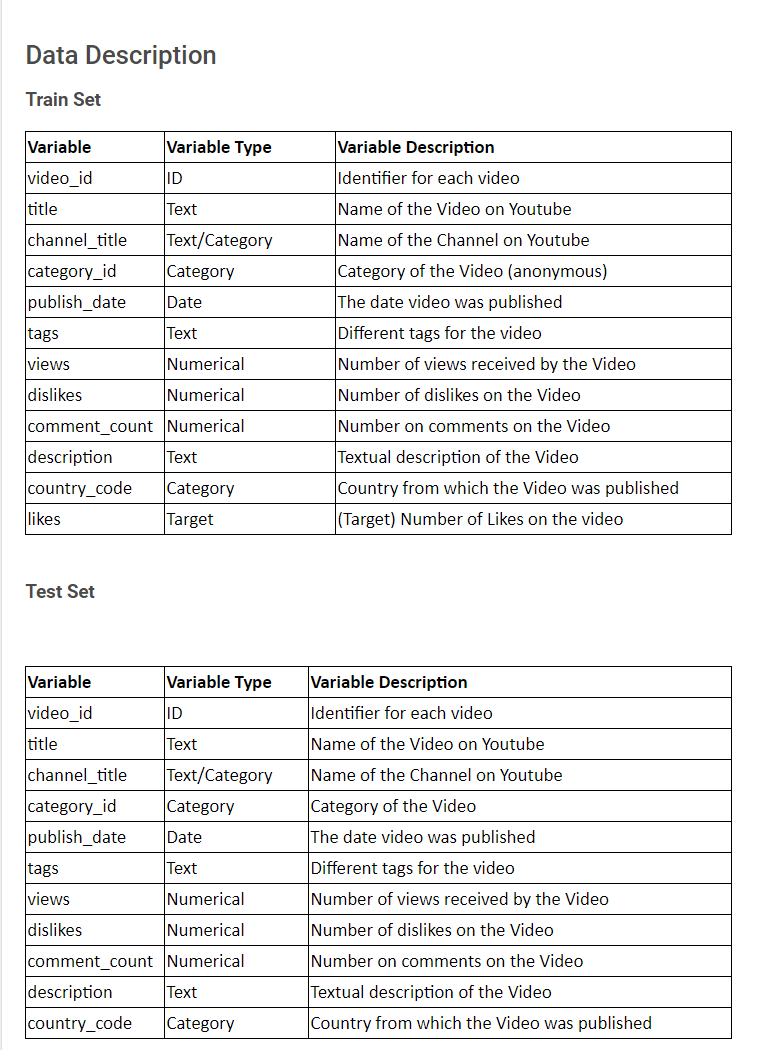

# 3. Target Distribution

The number of likes is the target variable which appears to be continous in nature, hence indicating that it is a classic regression problem.

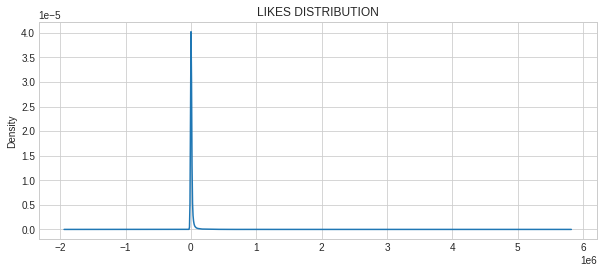

In [74]:
# Right skewed target variable, hence apply log transformation
_ = pd.Series((data['likes'])).plot(kind='density', title='LIKES DISTRIBUTION', figsize=(10,4))

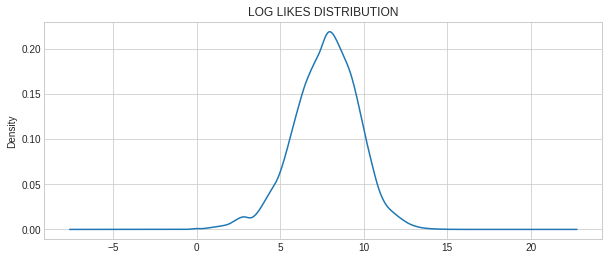

In [75]:
_ = pd.Series(np.log1p(data['likes'])).plot(kind='density', title='LOG LIKES DISTRIBUTION', figsize=(10,4))

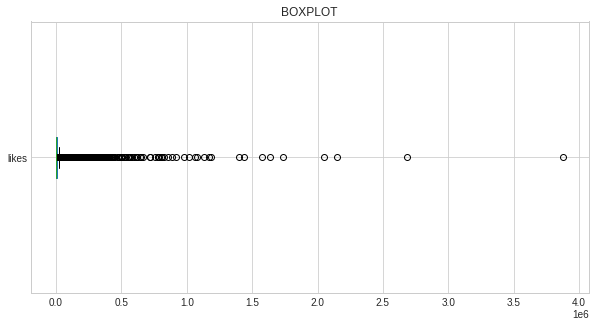

In [77]:
# There are so many outliers present in the data
_ = pd.Series(data['likes']).plot(kind='box', title='BOXPLOT of TARGET VARIABLE', figsize=(10,5), vert=False)

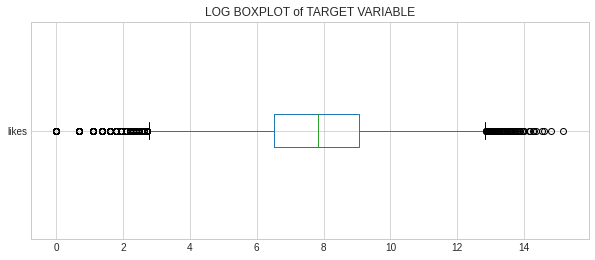

In [79]:
# This also has outliers but much more equitably distributed on either sides
_ = pd.Series(np.log1p(data['likes'])).plot(kind='box', vert=False, title='LOG BOXPLOT of TARGET VARIABLE', figsize=(10,4))

# 4. Variable Types

- There are two category IDs, out of which video id is a unique identifier, hence we neglect that.
- There are numerical variables such as views, dislikes, comment counts.
- There are categorical variables such as channel title, description, country code, tile, and tags.
- The publish date is the datetime variable.


There are no missing values present in the data to be handled.

In [80]:
data.dtypes

index              int64
video_id           int64
title             object
channel_title     object
category_id      float64
publish_date      object
tags              object
views            float64
dislikes         float64
comment_count    float64
description       object
country_code      object
likes            float64
source            object
dtype: object

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37231 entries, 0 to 37230
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          37231 non-null  int64  
 1   video_id       37231 non-null  int64  
 2   title          37231 non-null  object 
 3   channel_title  37231 non-null  object 
 4   category_id    37231 non-null  float64
 5   publish_date   37231 non-null  object 
 6   tags           37231 non-null  object 
 7   views          37231 non-null  float64
 8   dislikes       37231 non-null  float64
 9   comment_count  37231 non-null  float64
 10  description    37231 non-null  object 
 11  country_code   37231 non-null  object 
 12  likes          26061 non-null  float64
 13  source         37231 non-null  object 
dtypes: float64(5), int64(2), object(7)
memory usage: 4.0+ MB


In [82]:
data.isna().sum()

index                0
video_id             0
title                0
channel_title        0
category_id          0
publish_date         0
tags                 0
views                0
dislikes             0
comment_count        0
description          0
country_code         0
likes            11170
source               0
dtype: int64

In [83]:
data.nunique()

index            26061
video_id         37231
title            37127
channel_title     6979
category_id         17
publish_date       399
tags             30362
views            35792
dislikes          3123
comment_count     5937
description      33160
country_code         4
likes            12134
source               2
dtype: int64

# 5. Exploratory Data Analysis

In [69]:
data.describe()

index      video_id   category_id         views       dislikes  \
count  37231.000000  37231.000000  37231.000000  3.723100e+04   37231.000000   
mean   10796.210013  44646.683651     21.494830  3.846929e+05     547.670275   
std     7374.297510  25724.816319      6.328145  1.461505e+06    4091.644652   
min        0.000000      2.000000      1.000000  7.870000e+02       0.000000   
25%     4653.500000  22485.000000     22.000000  6.836150e+04      53.000000   
50%     9307.000000  44639.000000     24.000000  1.526900e+05     134.000000   
75%    16752.500000  66909.000000     25.000000  3.382355e+05     348.000000   
max    26060.000000  89275.000000     43.000000  1.434083e+08  483930.000000   

       comment_count         likes  
count   37231.000000  2.606100e+04  
mean     1704.944885  1.258067e+04  
std      9325.197475  5.856355e+04  
min         0.000000  0.000000e+00  
25%        94.000000  6.830000e+02  
50%       390.000000  2.541000e+03  
75%      1220.000000  8.553000e+03  
max    692312.000000  3.880088e+06

The average number of comments in the videos are 1705, while the average number of dislikes are 548

# Analyze Each Variable and their Relationshops

There are four types of variables:
1. Numerical
2. Categorical
3. Textual
4. Datetime

Our Target Variable is continous, hence we perform:
1. Univariate Analysis
2. Bivariate Analysis

In [19]:
# Segregating the numerical and categorical variables
id_column = ['video_id', 'category_id']
dt_column = 'publish_date'
src = 'source'
target = 'likes'
features = [c for c in train.columns if c not in [id_column, target, dt_column, src]]
cat_cols = data.select_dtypes(include=['object'])

# categorical variables
cat_cols = [c for c in features if c in cat_cols]
# numerical variables
num_cols = [n for n in features if (n not in cat_cols)]
num_cols = [n for n in num_cols if (n not in id_column)]
display(cat_cols)
display(num_cols)

['title', 'channel_title', 'tags', 'description', 'country_code']

['views', 'dislikes', 'comment_count']

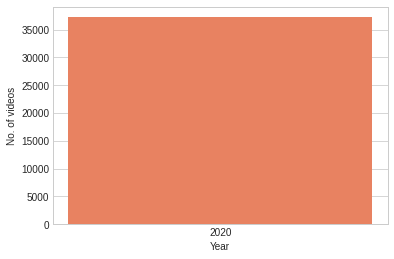

In [68]:
cdf = data["publish_date"].apply(lambda x: '20' + x[:2]).value_counts() \
            .to_frame().reset_index() \
            .rename(columns={"index": "year", "publish_date": "No_of_videos"})

fig, ax = plt.subplots()
_ = sns.barplot(x="year", y="No_of_videos", data=cdf, 
                palette=sns.color_palette(['#ff764a', '#ffa600'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Year", ylabel="No. of videos")

All the videos are recorded in year 2020 only, hence no yearly trends possible

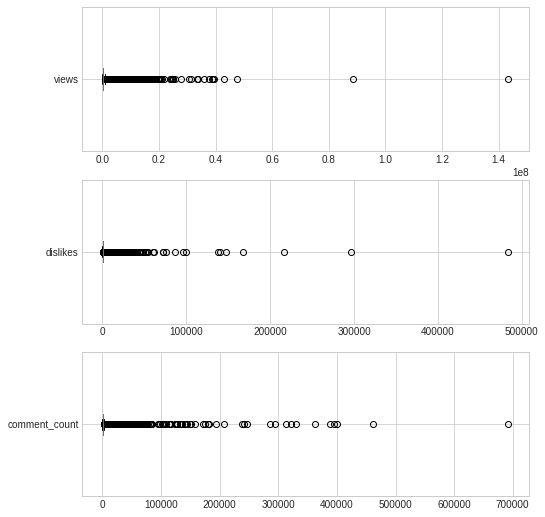

In [84]:
fig, axes = plt.subplots(3, 1, figsize=(8, 9))
for i, c in enumerate(num_cols):
  _ = data[[c]].boxplot(ax=axes[i], vert=False)

The boxplots of the numerical features indicate highly right skewed nature, and high number of outliers as well. Hence, we need to logarithmically normalize these features in order to gain better information.

In [18]:
def data_distribution(data, feature):
    
    plt.figure(figsize = (20,5))
    print("Distribution of ", feature)
    plt.subplot(1,3,1)
    sns.kdeplot(data[feature], shade=True)

    plt.subplot(1,3,2)
    sns.distplot(data[feature])

    plt.subplot(1,3,3)
    sns.boxplot(data[feature], orient = 'vertical')

    print("Skewness : {}, Kurtosis : {}".format(data[feature].skew(), data[feature].kurtosis()))
    plt.show()

Distribution of  views
Skewness : 39.743191555304776, Kurtosis : 2993.6059542842254


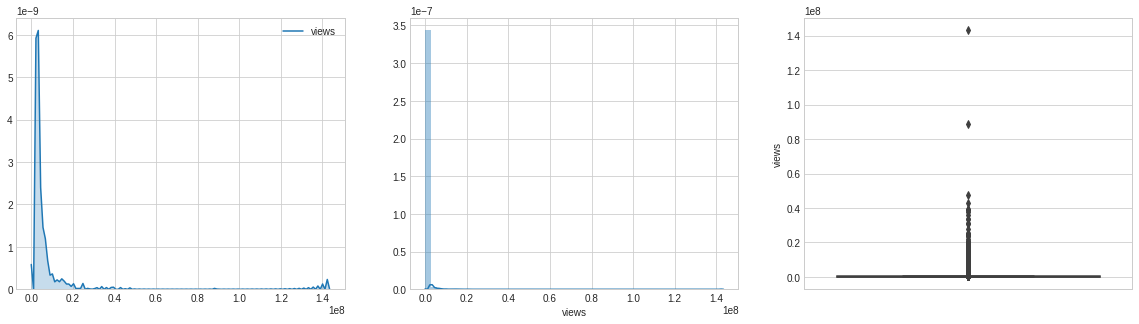

Distribution of  dislikes
Skewness : 66.24250651908099, Kurtosis : 6401.684372632718


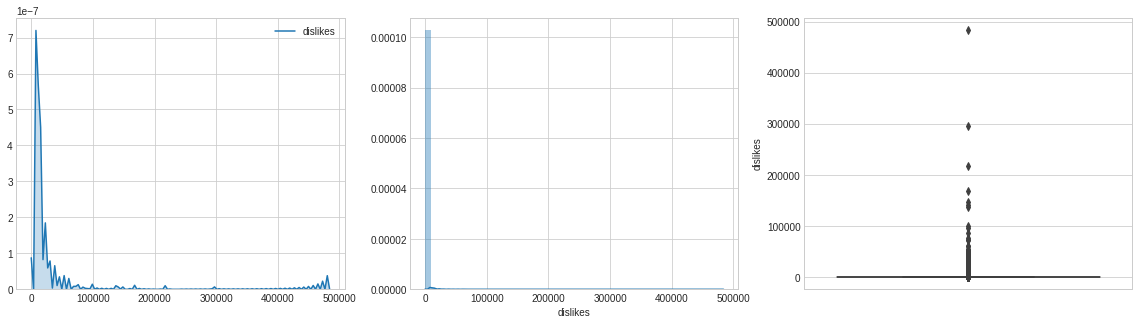

Distribution of  comment_count
Skewness : 31.860066840751777, Kurtosis : 1530.4814295442864


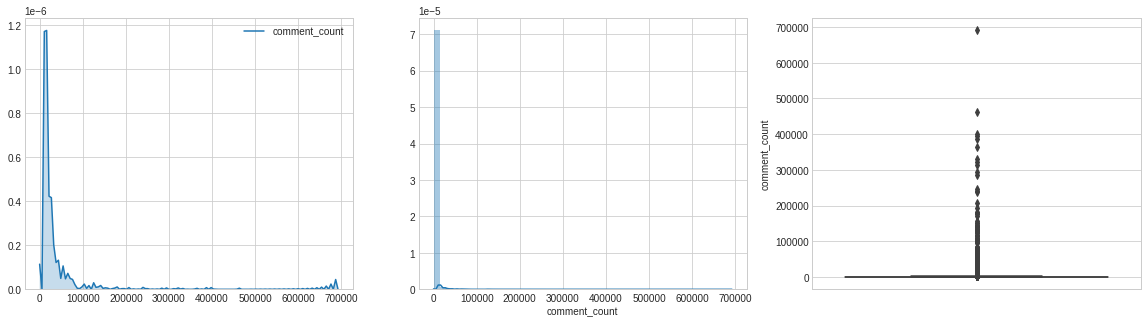

In [20]:
for i in num_cols:
    data_distribution(data, i)

<Figure size 864x432 with 0 Axes>

Text(0.5, 1.0, 'VIEWS LOG DISTRIBUITION')

Text(0.5, 1.0, 'LIKES LOG DISTRIBUITION')

Text(0.5, 1.0, 'DISLIKES LOG DISTRIBUITION')

Text(0.5, 1.0, 'COMMENTS LOG DISTRIBUITION')

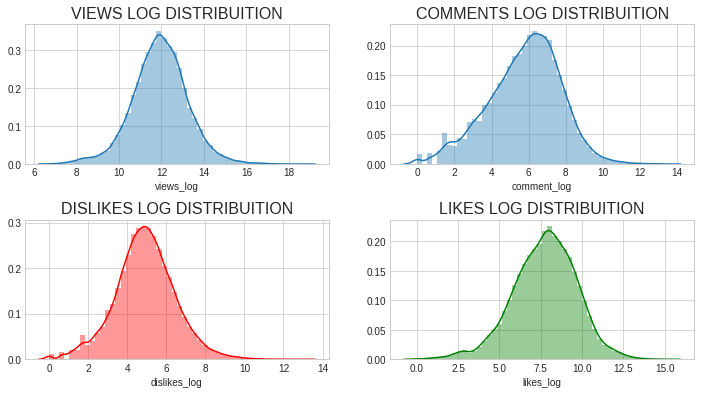

In [21]:
df_yout = data.copy()
df_yout['likes_log'] = np.log(df_yout['likes'] + 1)
df_yout['views_log'] = np.log(df_yout['views'] + 1)
df_yout['dislikes_log'] = np.log(df_yout['dislikes'] + 1)
df_yout['comment_log'] = np.log(df_yout['comment_count'] + 1)

plt.figure(figsize = (12,6))

plt.subplot(221)
g1 = sns.distplot(df_yout['views_log'])
g1.set_title("VIEWS LOG DISTRIBUITION", fontsize=16)

plt.subplot(224)
g2 = sns.distplot(df_yout['likes_log'],color='green')
g2.set_title('LIKES LOG DISTRIBUITION', fontsize=16)

plt.subplot(223)
g3 = sns.distplot(df_yout['dislikes_log'], color='r')
g3.set_title("DISLIKES LOG DISTRIBUITION", fontsize=16)

plt.subplot(222)
g4 = sns.distplot(df_yout['comment_log'])
g4.set_title("COMMENTS LOG DISTRIBUITION", fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

The log transformed features are fairly normal in nature that can favour the distribution to a much more better degree.

In [85]:
# Applied Log Transformation
for c in num_cols + ['likes']:
  data[c] = np.log1p(data[c]) 

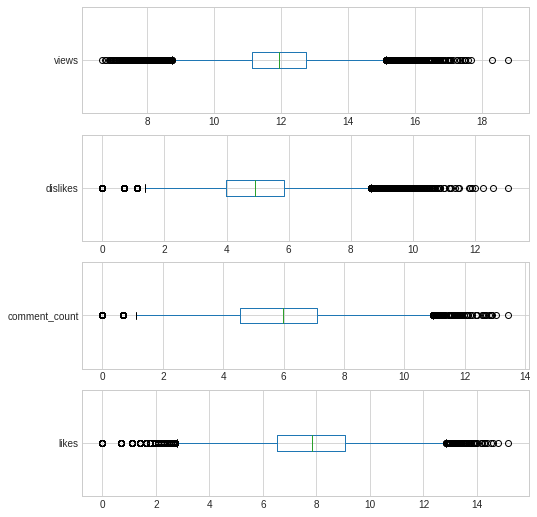

In [87]:
fig, axes = plt.subplots(4, 1, figsize=(8, 9))
for i, c in enumerate(num_cols + ['likes']):
  _ = data[[c]].boxplot(ax=axes[i], vert=False)

- The correlation heatmap reveals high correlation between the target and number of comments on a video.
- The number of views, and dislikes are also highly correlated with the target variable.

<Figure size 1008x576 with 0 Axes>

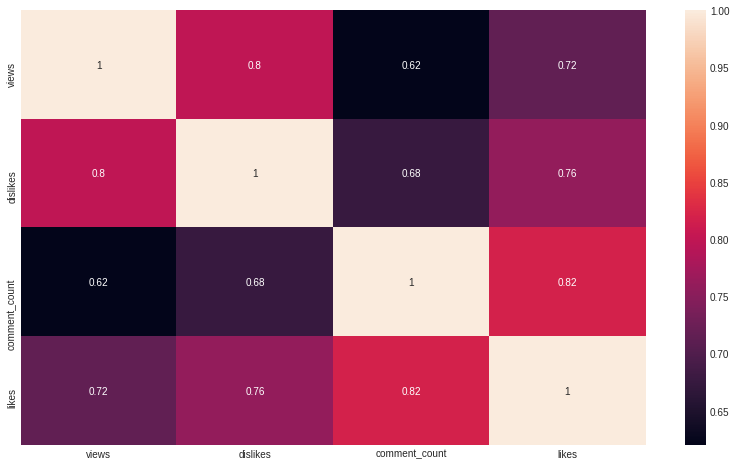

In [88]:
plt.figure(figsize=(14, 8))
_ = sns.heatmap(data[num_cols + ['likes']].corr(), annot=True)

The number of views is positively correlated with all variables. As well as, only the number of comments, and views are a little flattened with likes at higher counts.

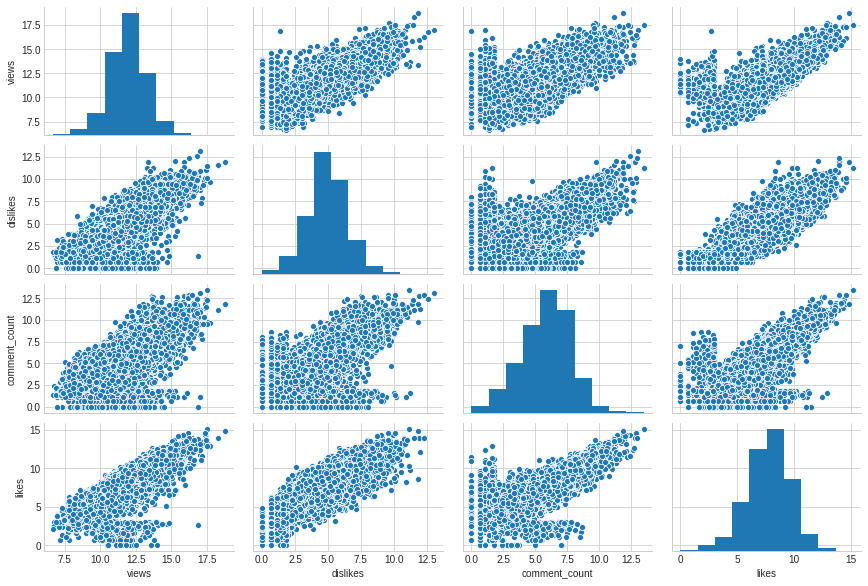

In [90]:
_ = sns.pairplot(data[num_cols + ['likes']], height=2, aspect=24/16)

* **Do videos with more views get more likes** ?

Yes they do, we have a high correlation of 0.72 also the plot between the two variables shows this.

* **Do videos with more comments get more likes** ?

Yes they do, we have a high correlation of 0.82 also the plot between the two variables shows this.

* **Do videos with more dislikes get less likes** ?

Any form of popularity is good popularity. As the number dislikes increases, number of views increases too, and so the number of likes.


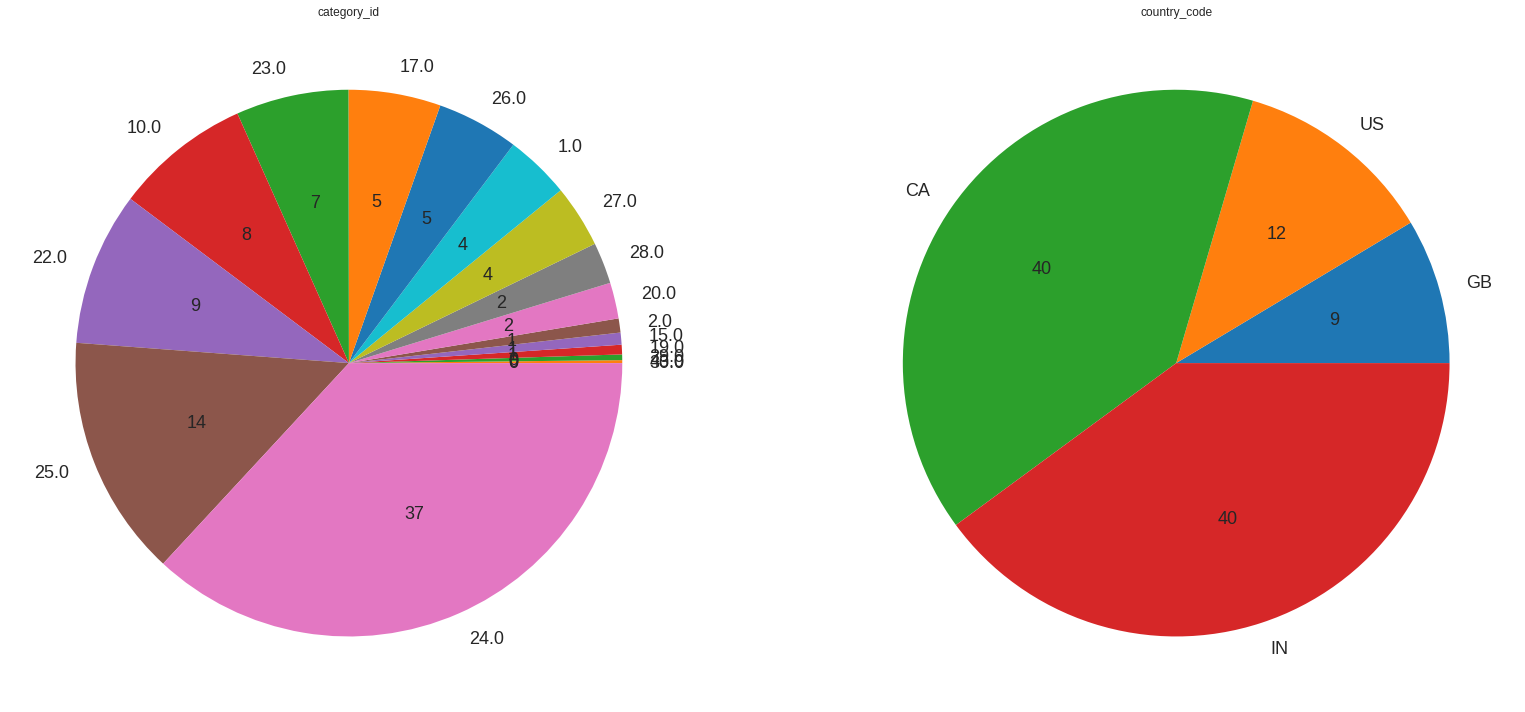

In [91]:
cat_cols = ['category_id', 'country_code', 'channel_title']
fig, axes = plt.subplots(1, 2, figsize=(24, 10))

for i, c in enumerate(['category_id', 'country_code']):
    _ = train[c].value_counts()[::-1].plot(kind = 'pie', ax=axes[i], title=c, autopct='%.0f', fontsize=18)
    _ = axes[i].set_ylabel('')
    
_ = plt.tight_layout()

In [92]:
data

index  video_id                                              title  \
0          0     53364  Alif Allah Aur Insaan Episode 34 HUM TV Drama ...   
1          1     51040  It's Showtime Miss Q & A: Bela gets jealous of...   
2          2      1856  ದರ್ಶನ್ ಗೆ ಬಾರಿ ಅವಮಾನ ಮಾಡಿದ ಶಿವಣ್ಣ ನಾಯಕಿ \n  ಕ್...   
3          3     22618       Havana - swing cover | dodie feat. FLASHBACK   
4          4     74074  MUMMY NE NI KEHTA - 2  FT. 102 NOT OUT| DUDE S...   
...      ...       ...                                                ...   
37226  11165     19415  Tapu Sena's Summer Vacation | Tapu Sena Specia...   
37227  11166     25168        Senselet Drama S02 EP43 ሰንሰለት ምዕራፍ 2 ክፍል 43   
37228  11167     80293           Being Woman | Girl Formula | Chai Bisket   
37229  11168     80880                  Deivamagal Episode 1455, 05/02/18   
37230  11169      6514  They Are Doing Things That Should Truly Scare You   

               channel_title  category_id publish_date  \
0                     HUM TV         24.0   2017-12-12   
1      ABS-CBN Entertainment         24.0   2018-03-08   
2         SANDALWOOD REVIEWS         24.0   2018-03-26   
3                doddleoddle         10.0   2018-02-21   
4             Dude Seriously         23.0   2018-05-10   
...                      ...          ...          ...   
37226                 SAB TV         24.0   2018-03-30   
37227         Senselet Drama          1.0   2018-04-28   
37228           Girl Formula         24.0   2018-03-08   
37229              VikatanTV         43.0   2018-02-05   
37230                 Amplex         24.0   2018-03-08   

                                                    tags      views  dislikes  \
0      HUM|"TV"|"Alif Allah Aur Insaan"|"Episode 34"|...  12.769769  5.700444   
1      ABS-CBN Entertainment|"ABS-CBN"|"ABS-CBN Onlin...  13.042257  4.317488   
2      challenging star darshan latest news|"challeng...  10.601772  5.017280   
3      havana|"cover"|"a capella"|"swing"|"dodie"|"fl...  13.141631  6.742881   
4      dude|"seriously"|"friends"|"fun"|"gujarati"|"h...  11.216028  4.248495   
...                                                  ...        ...       ...   
37226  tapu sena special|"tapu special clips"|"taarak...  12.588811  5.638355   
37227  Senselet|"Senselet part 43"|"senselet 43"|"Zem...  11.908663  4.762174   
37228  girl formula|"short film"|"telugu"|"telugu fun...  11.836870  5.017280   
37229  deivamagal|"deiva magal"|"deiva magal serial"|...  13.839277  8.074960   
37230  educational|"secrets"|"hidden"|"truth"|"myster...  11.905447  5.241747   

       comment_count                                        description  \
0           6.803505  Alif Allah Aur Insaan Episode 34 Full - 12 Dec...   
1           5.752573  Vice Ganda notices Bela Padilla's sudden chang...   
2           4.615121  ದರ್ಶನ್ ಗೆ ಬಾರಿ ಅವಮಾನ ಮಾಡಿದ ಶಿವಣ್ಣ ನಾಯಕಿ    ಕ್ಲ...   
3           8.420021  Hi hi hi! here's our vid on FLASHBACK's channe...   
4           5.087596  BOOK YOUR TICKETS HERE:  https://goo.gl/QxdSyg...   
...              ...                                                ...   
37226       4.820282  Click here to Subscribe to SAB TV Channel : ht...   
37227       6.761573  ድርሰት: ተመስገን አፈወርቅ\nአዘጋጆች: ቴዎድሮስ ለገሰ ብዙ እና ተመስገ...   
37228       7.339538  Don't put her on a pedestal. Don't shame her f...   
37229       6.981006  Deivamagal Episode 1455\nSubscribe: https://go...   
37230       6.841615  ➨Check Out our Online Store: https://amplex-li...   

      country_code      likes source  
0               CA   7.763021  train  
1               CA   8.091015  train  
2               IN   6.364751  train  
3               GB  11.323869  train  
4               IN   8.176954  train  
...            ...        ...    ...  
37226           IN        NaN   test  
37227           CA        NaN   test  
37228           IN        NaN   test  
37229           IN        NaN   test  
37230           CA        NaN   test  

[37231 rows x 14 columns]

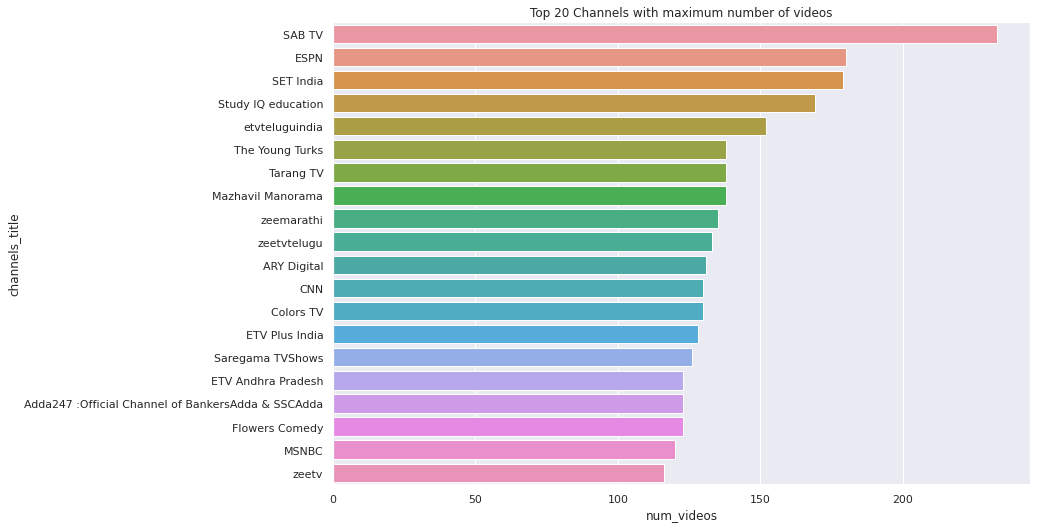

In [95]:
sns.set(rc={'figure.figsize':(12.5, 8.5)})
top_20_channels = data['channel_title'].value_counts()[:20].reset_index()
top_20_channels.columns = ['channels_title', 'num_videos']

_ = sns.barplot(data=top_20_channels, y='channels_title', x='num_videos')
_ = plt.title('Top 20 Channels with maximum number of videos')

## Bivariate Analysis

In [96]:
country_wise_channels = data.groupby(['country_code', 'channel_title']).size().reset_index()

In [99]:
country_wise_channels.columns = ['country_code', 'channel_title', 'num_videos']

In [100]:
country_wise_channels = country_wise_channels.sort_values(by='num_videos', ascending=False)

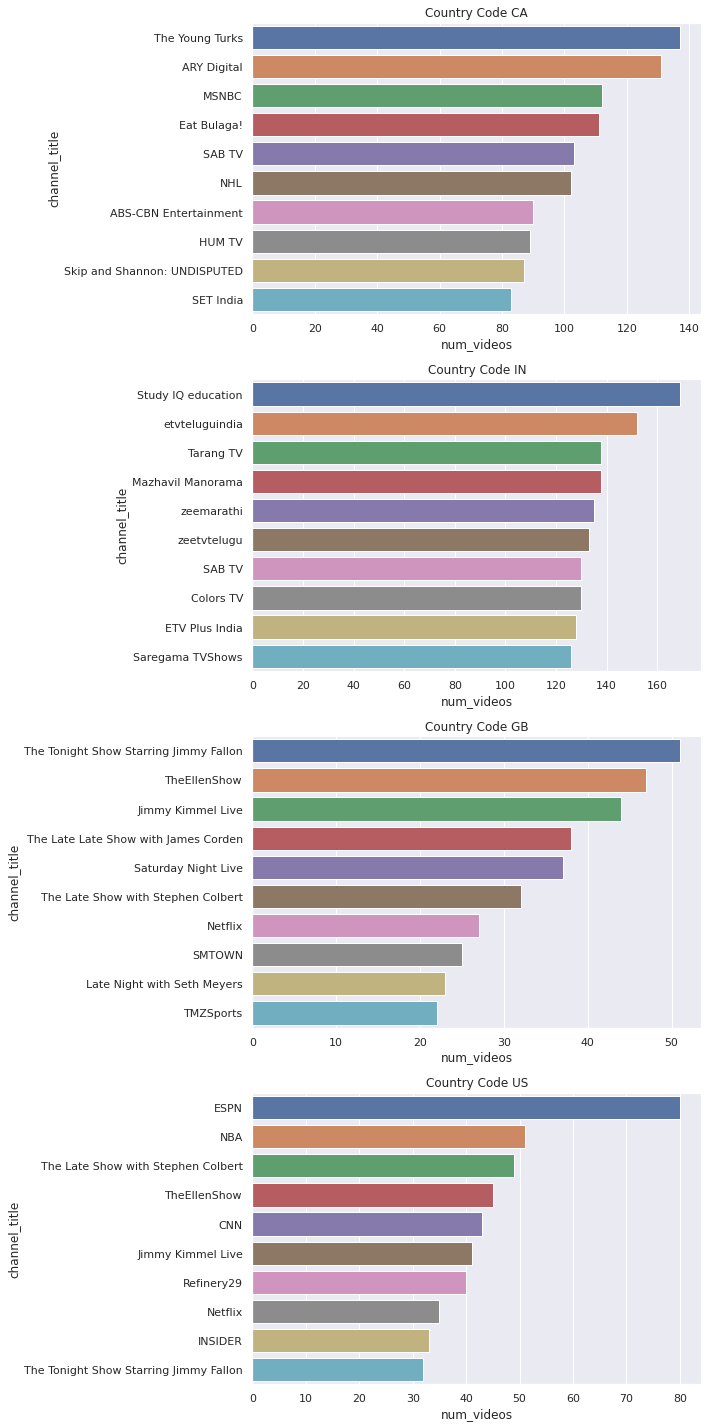

In [102]:
fig, axes = plt.subplots(4, 1, figsize=(10, 20))

for i, c in enumerate(train['country_code'].unique()):
  country = country_wise_channels[country_wise_channels['country_code'] == c][:10]
  _ = sns.barplot(x = 'num_videos', y = 'channel_title', data = country, ax = axes[i])
  _ = axes[i].set_title(f'Country Code {c}')

plt.tight_layout()

## Multivariate Analysis

This answers the query of DOES A CHANNEL AFFECT THE NUMBER OF LIKES?

In [103]:
country_wise_channels = data.groupby(['country_code', 'channel_title'])['likes'].max().reset_index()

In [104]:
country_wise_channels = country_wise_channels.sort_values(by=['likes'], ascending=False)

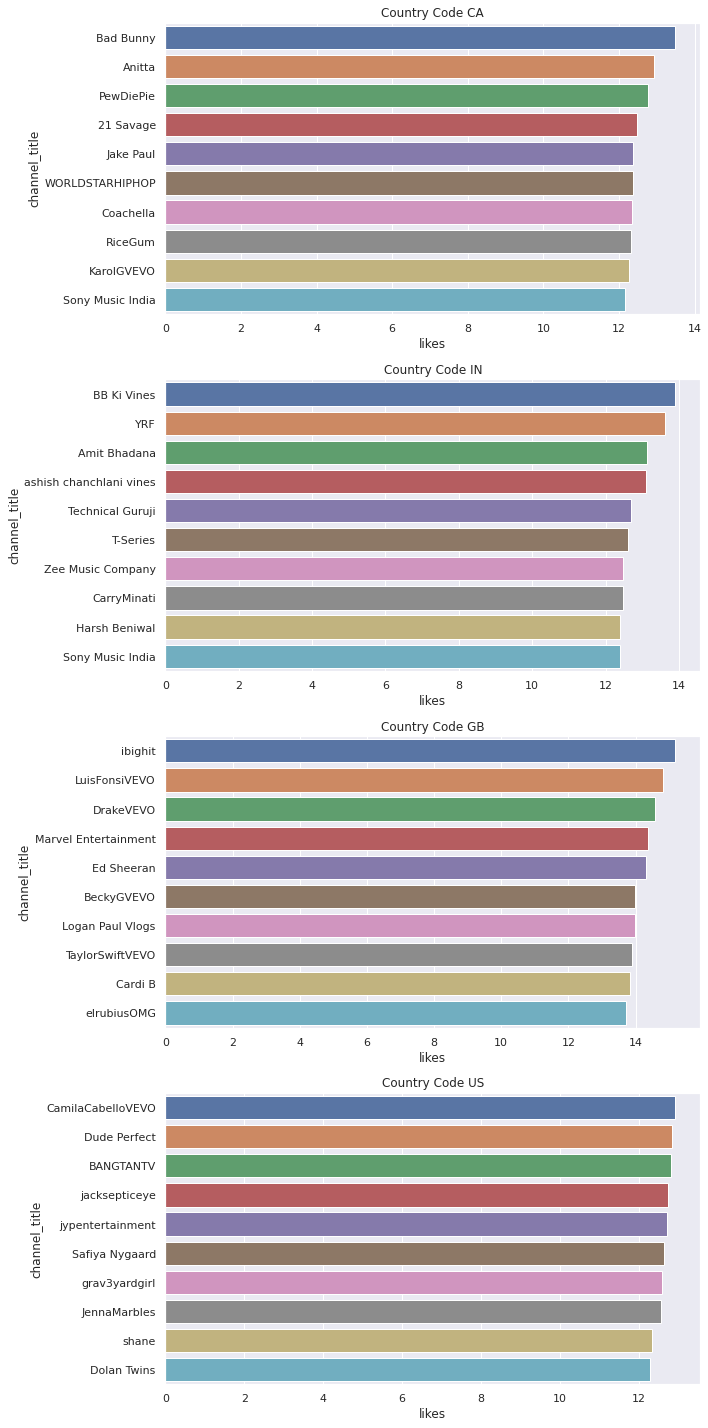

In [105]:
fig, axes = plt.subplots(4, 1, figsize=(10, 20))

for i, c in enumerate(train['country_code'].unique()):
  country = country_wise_channels[country_wise_channels['country_code'] == c][:10]
  _ = sns.barplot(x = 'likes', y = 'channel_title', data = country, ax = axes[i])
  _ = axes[i].set_title(f'Country Code {c}')

plt.tight_layout()

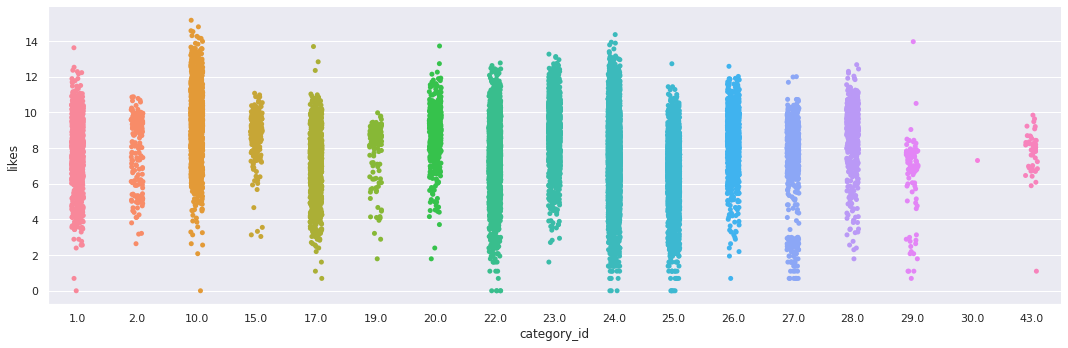

In [106]:
# Category 10 is the highest with likes
_ = sns.catplot(x='category_id', y='likes', data=data, height=5, aspect=24/8)

Videos posted in England have higher number of likes than other countries

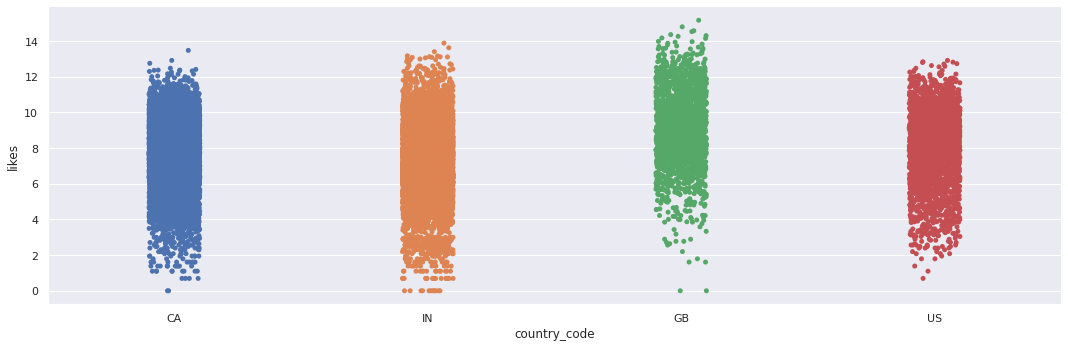

In [107]:
_ = sns.catplot(x='country_code', y='likes', data=data, height=5, aspect=24/8)

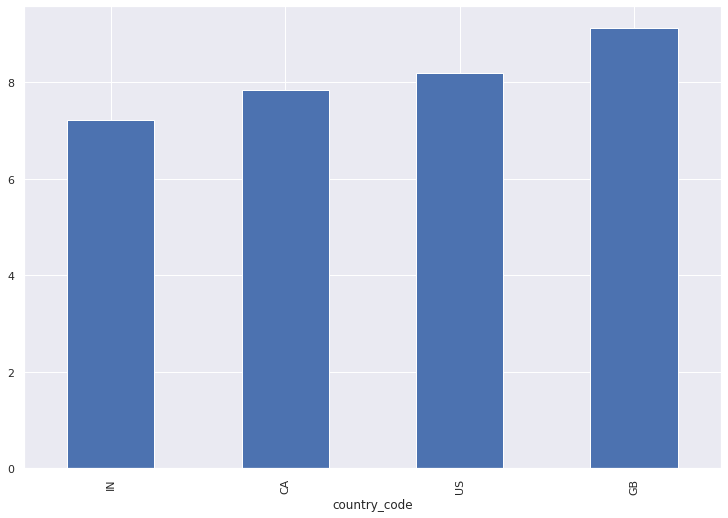

In [108]:
_ = data.groupby('country_code')['likes'].mean().sort_values().plot(kind='bar')

## Datetime Features

In [109]:
data['publish_date'] = pd.to_datetime(data['publish_date'], format='%Y-%m-%d')
data['publish_date']

0       2017-12-12
1       2018-03-08
2       2018-03-26
3       2018-02-21
4       2018-05-10
           ...    
37226   2018-03-30
37227   2018-04-28
37228   2018-03-08
37229   2018-02-05
37230   2018-03-08
Name: publish_date, Length: 37231, dtype: datetime64[ns]

In [110]:
data['publish_date'].max(), data['publish_date'].min()

(Timestamp('2018-06-14 00:00:00'), Timestamp('2006-07-23 00:00:00'))

In [111]:
data['publish_date'].dt.year.value_counts()

2018    26828
2017    10271
2015       22
2016       21
2013       19
2011       17
2014       14
2012       11
2010        8
2009        8
2008        8
2007        3
2006        1
Name: publish_date, dtype: int64

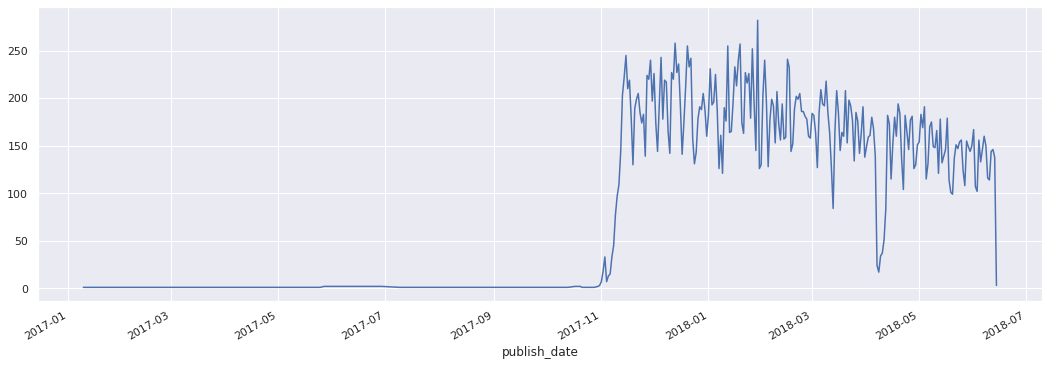

In [113]:
latest_videos = data[data['publish_date']>'2017']
_ = latest_videos.sort_values(by='publish_date').groupby('publish_date').size().plot(figsize=(18,6))

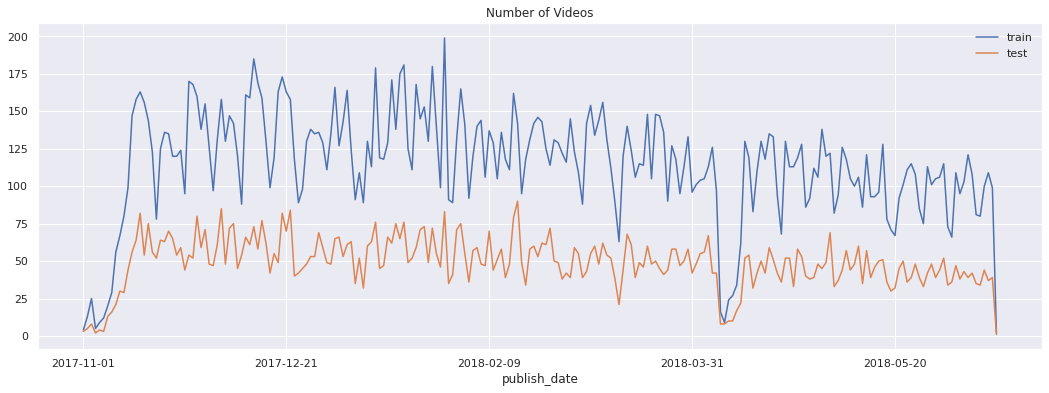

In [114]:
latest_data_train = train[train['publish_date'] > '2017-11']
latest_data_test = test[test['publish_date'] > '2017-11']
_ = latest_data_train.sort_values(by = 'publish_date').groupby('publish_date').size().rename('train').plot(figsize=(18, 6), title = 'Number of Videos')
_ = latest_data_test.sort_values(by = 'publish_date').groupby('publish_date').size().rename('test').plot(figsize=(18, 6), title = 'Number of Videos')
_ = plt.legend()

- The data is almost symmetrical for test and train in terms of number of videos with respect to the dates.
- The mean likes seems highest during april 2018

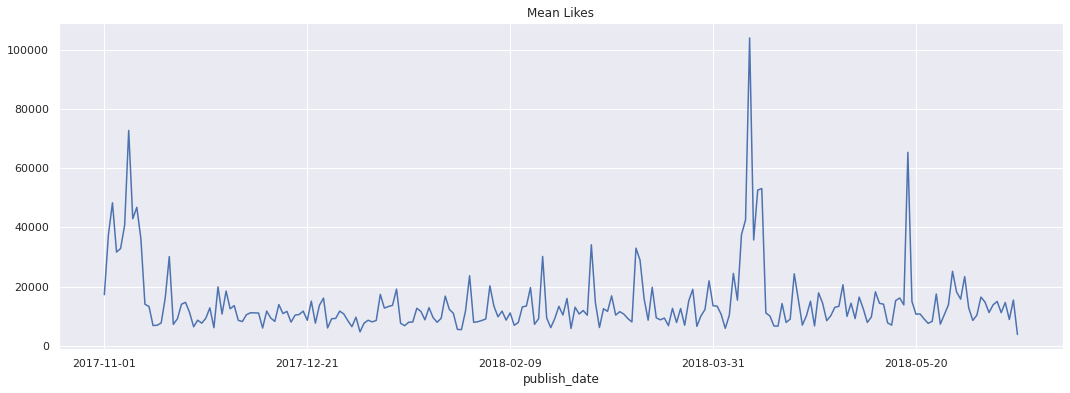

In [115]:
latest_data = train[train['publish_date'] > '2017-11']
_ = latest_data.sort_values(by = 'publish_date').groupby('publish_date')['likes'].mean().plot(figsize=(18, 6), title="Mean Likes")

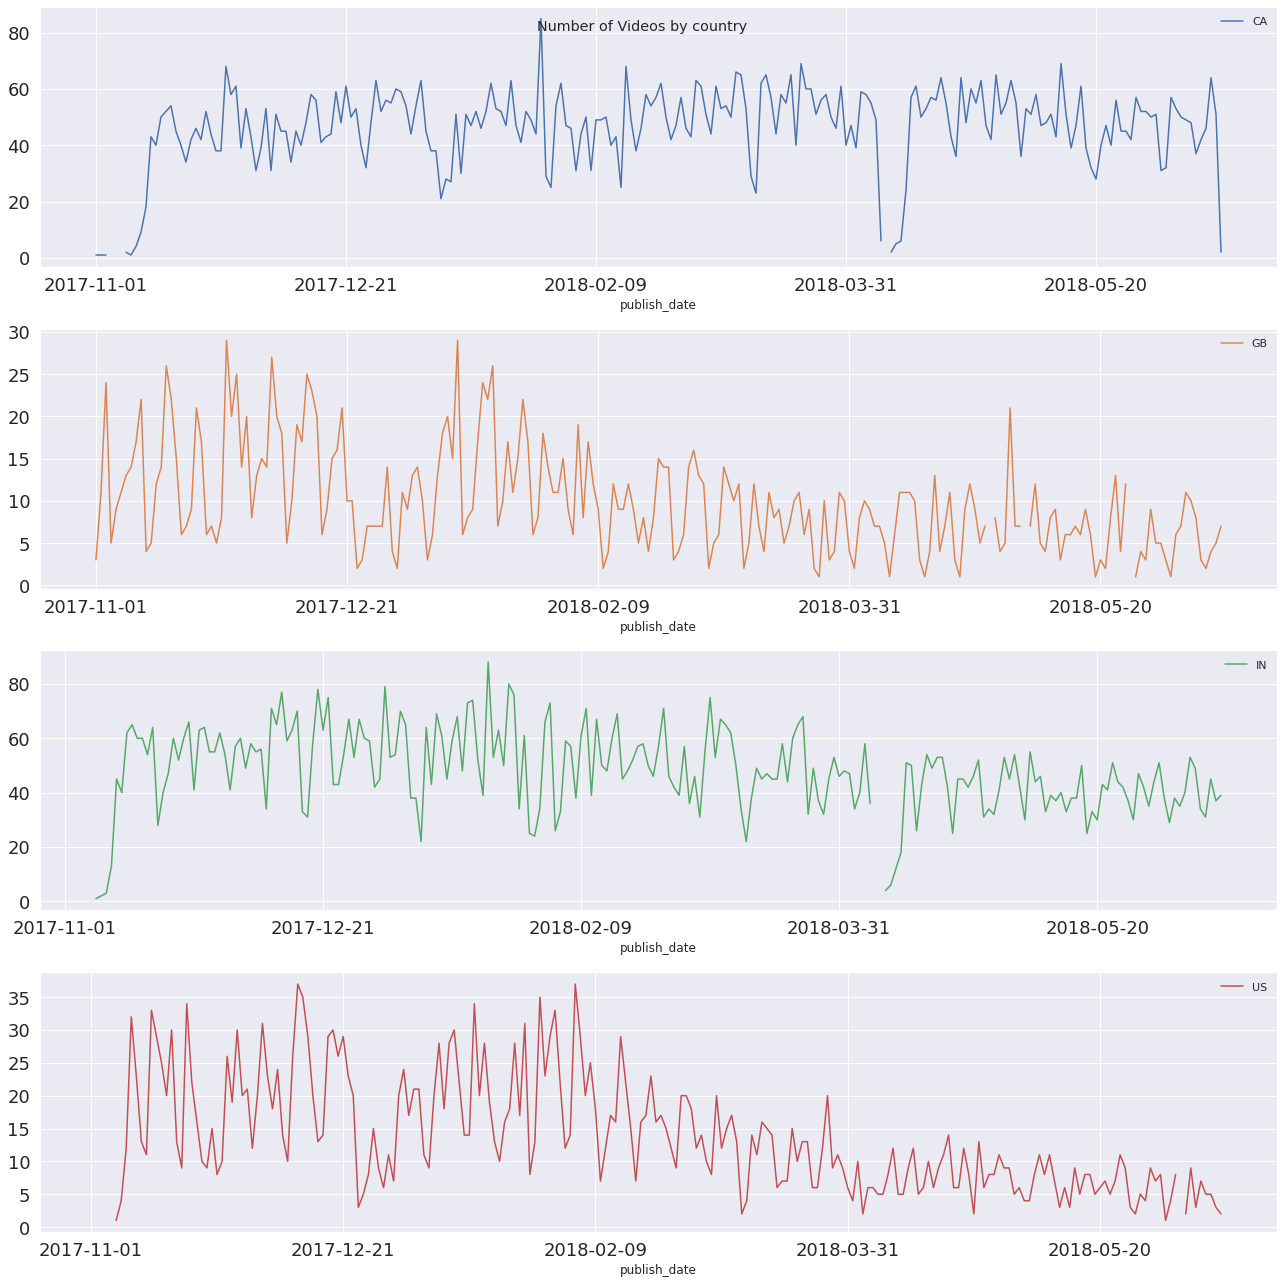

In [116]:
tmp = latest_data.groupby(['publish_date', 'country_code']).size().reset_index()
_ = tmp.pivot_table(index = 'publish_date', columns = 'country_code', values=0).plot(subplots=True, figsize=(18, 18),
                                                                                           title='Number of Videos by country',
                                                                                           sharex=False,
                                                                                           fontsize=18)
plt.tight_layout()

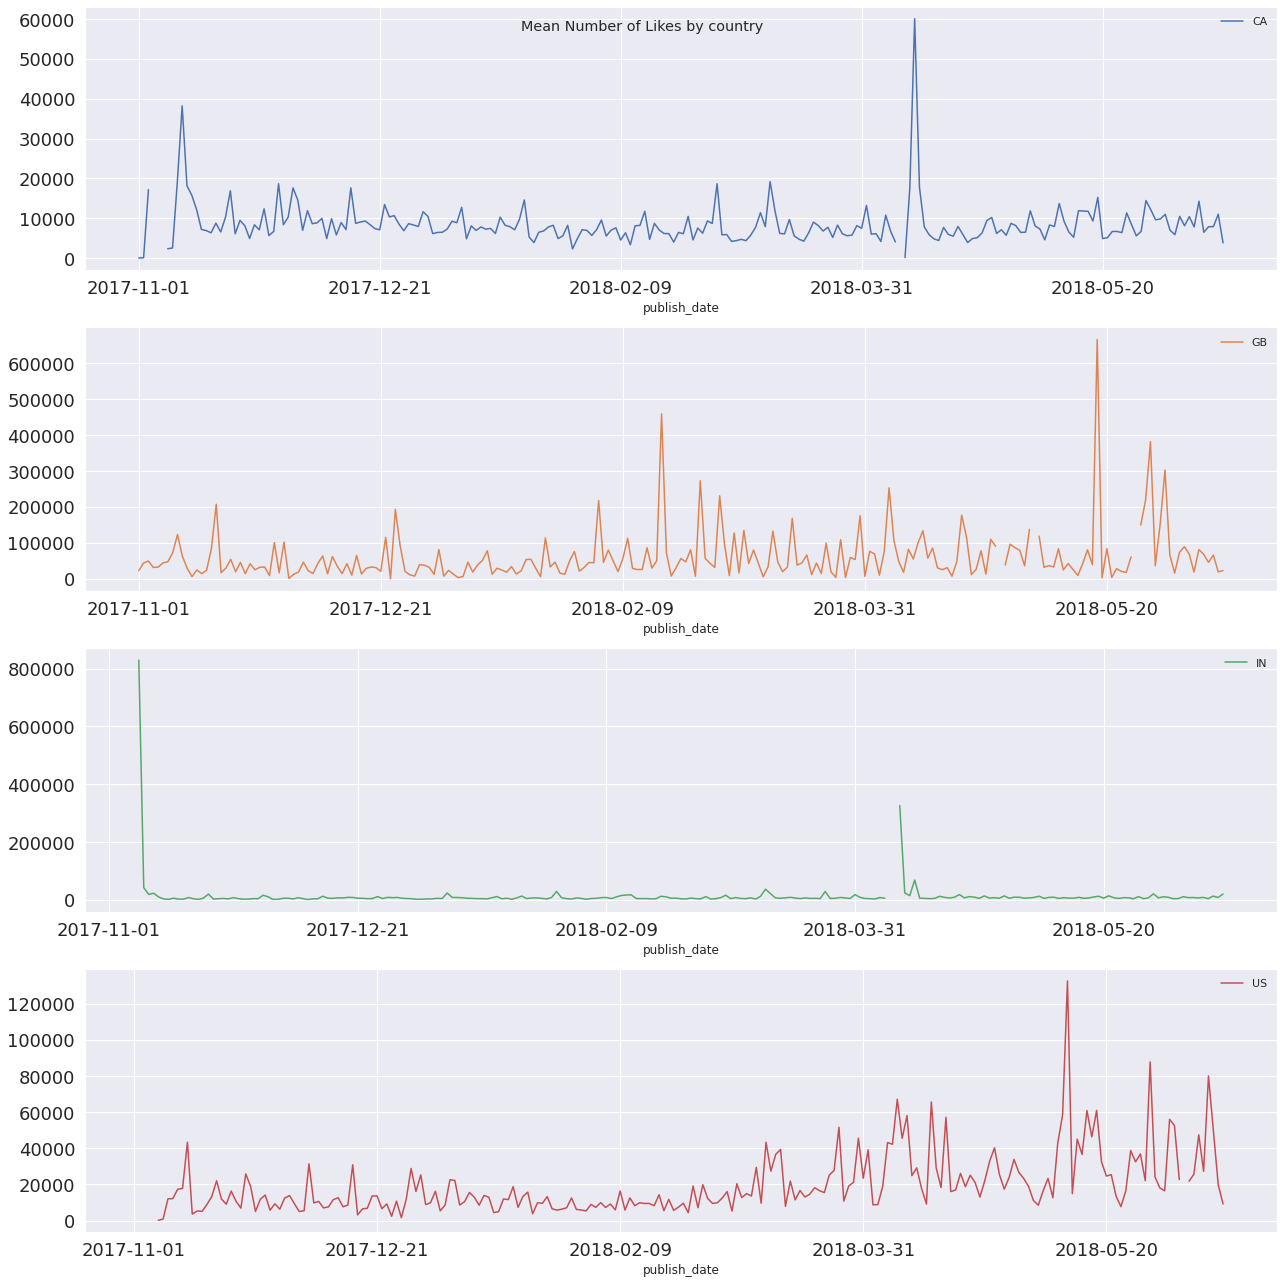

In [117]:
tmp = latest_data.groupby(['publish_date', 'country_code'])['likes'].mean().reset_index()
_ = tmp.pivot_table(index = 'publish_date', columns = 'country_code', values='likes').plot(subplots=True, figsize=(18, 18),
                                                                                           title='Mean Number of Likes by country',
                                                                                           sharex=False,
                                                                                           fontsize=18)
plt.tight_layout()

The trends for uploading videos in Great Britain and USA, are decreasing during the festival seasons due to people getting busy with other tasks during celebration as one possibility.

**Do People Post more Videos on Weekends than Weekdays?**

The maximum number of videos are uploaded on Friday, and not weekends.

In [118]:
data['day'] = data['publish_date'].dt.dayofweek

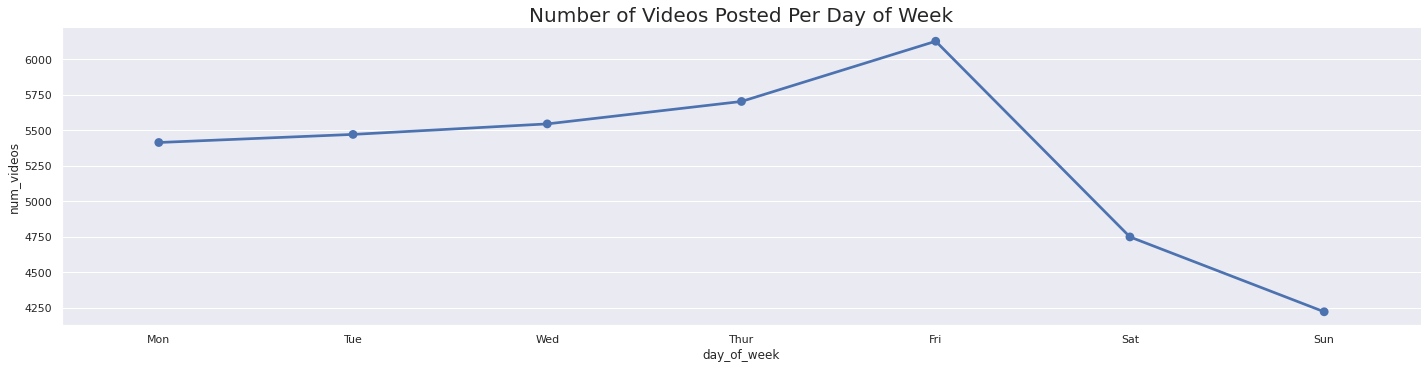

In [121]:
n_videos_per_day_of_week = data['day'].value_counts().sort_index().reset_index()
n_videos_per_day_of_week.columns = ['day_of_week', 'num_videos']
n_videos_per_day_of_week['day_of_week'] = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
_ = sns.catplot(x = 'day_of_week', y = 'num_videos', data = n_videos_per_day_of_week, kind = 'point',aspect = 24/6)
_ = plt.title("Number of Videos Posted Per Day of Week", fontsize=20)

In [122]:
text_cols = ['title', 'tags', 'description']

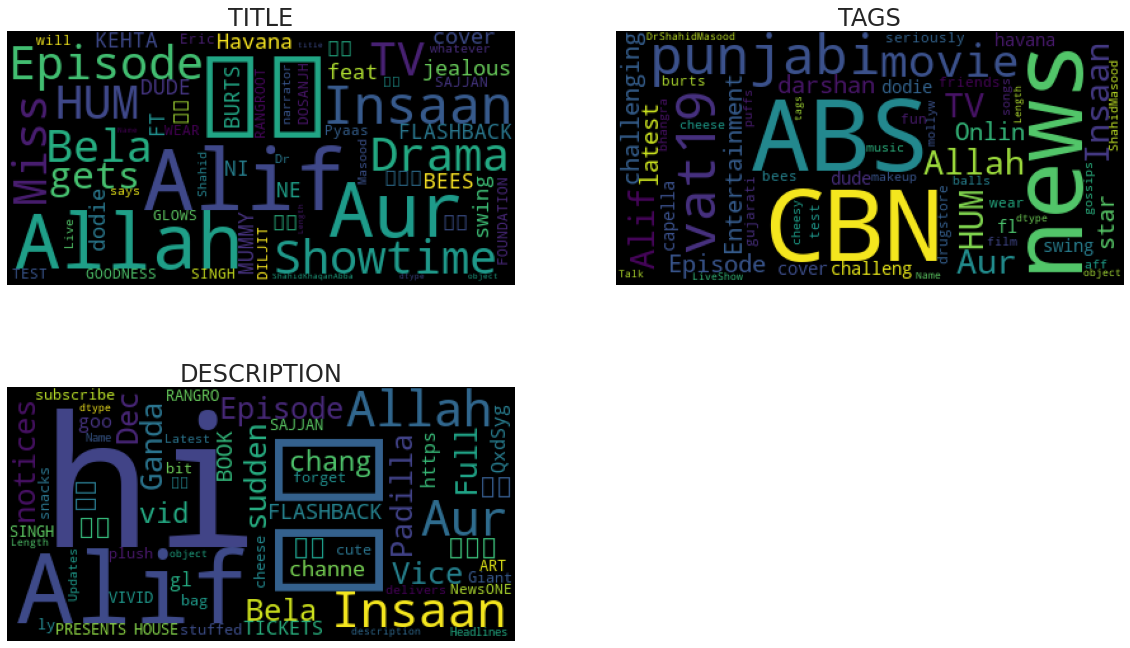

In [125]:
from wordcloud import WordCloud, STOPWORDS

wc = WordCloud(stopwords = set(list(STOPWORDS) + ['|']), random_state = 42)
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(text_cols):
  op = wc.generate(str(train[c]))
  _ = axes[i].imshow(op)
  _ = axes[i].set_title(c.upper(), fontsize=24)
  _ = axes[i].axis('off')

_ = fig.delaxes(axes[3])

In [126]:
def plot_countrywise(country_code = 'IN'):
  country = train[train['country_code'] == country_code]
  country = country[country['likes'] > 10]
  fig, axes = plt.subplots(2, 2, figsize=(20, 12))
  axes = [ax for axes_row in axes for ax in axes_row]

  for i, c in enumerate(text_cols):
    op = wc.generate(str(country[c]))
    _ = axes[i].imshow(op)
    _ = axes[i].set_title(c.upper(), fontsize=24)
    _ = axes[i].axis('off')

  fig.delaxes(axes[3])
  _ = plt.suptitle(f"Country Code: '{country_code}'", fontsize=30)

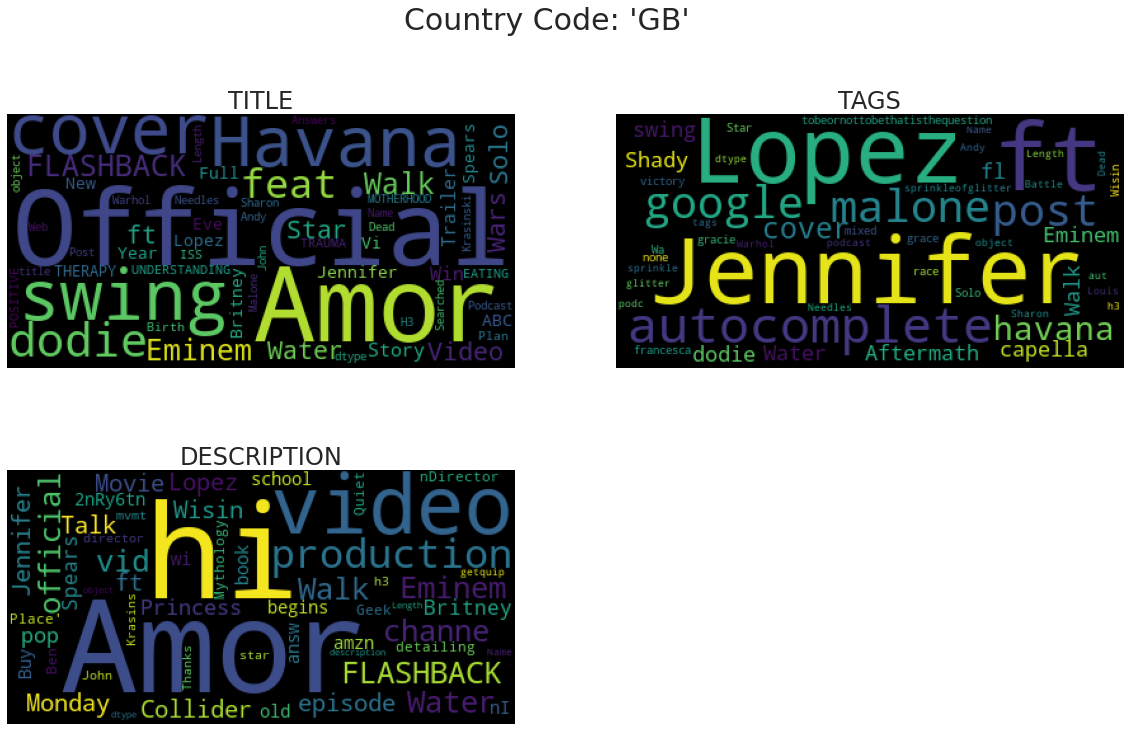

In [127]:
plot_countrywise(country_code='GB')

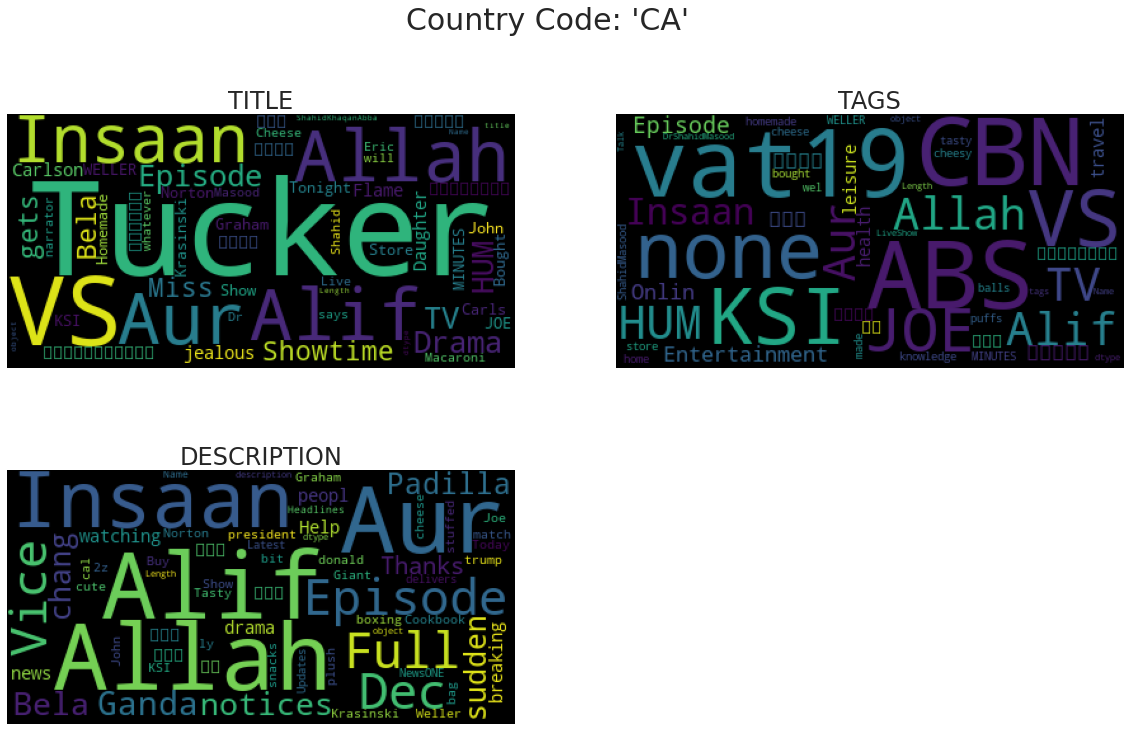

In [128]:
plot_countrywise(country_code='CA')

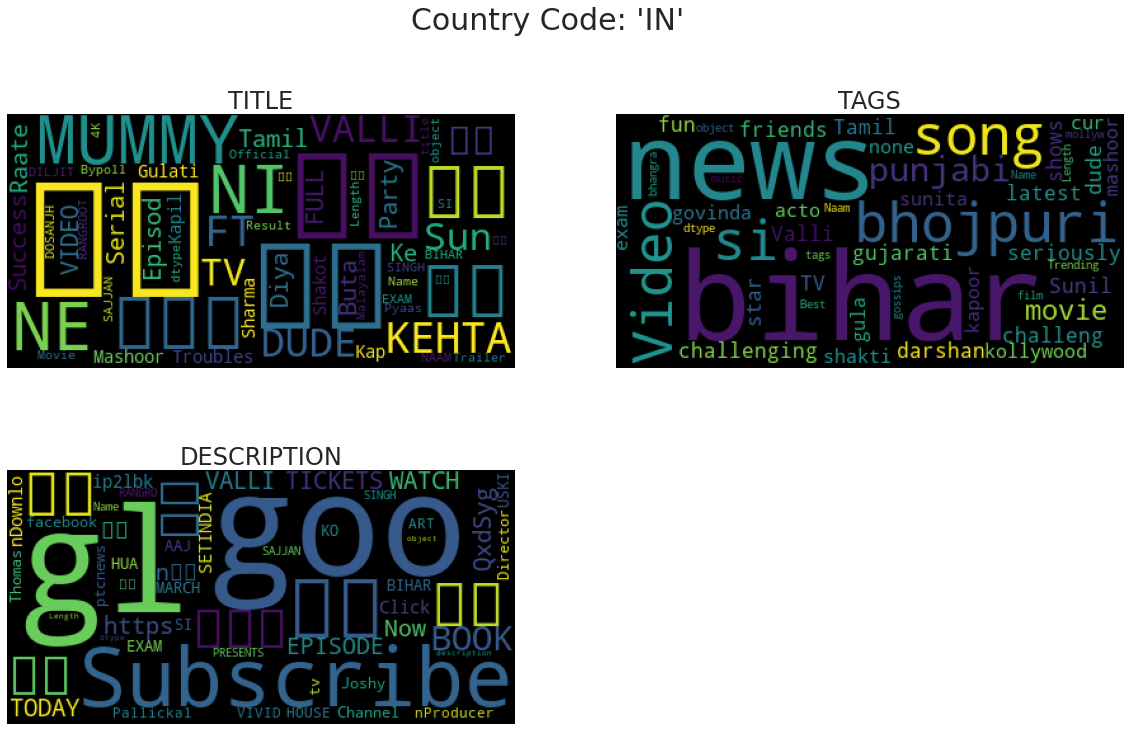

In [129]:
plot_countrywise(country_code='IN')

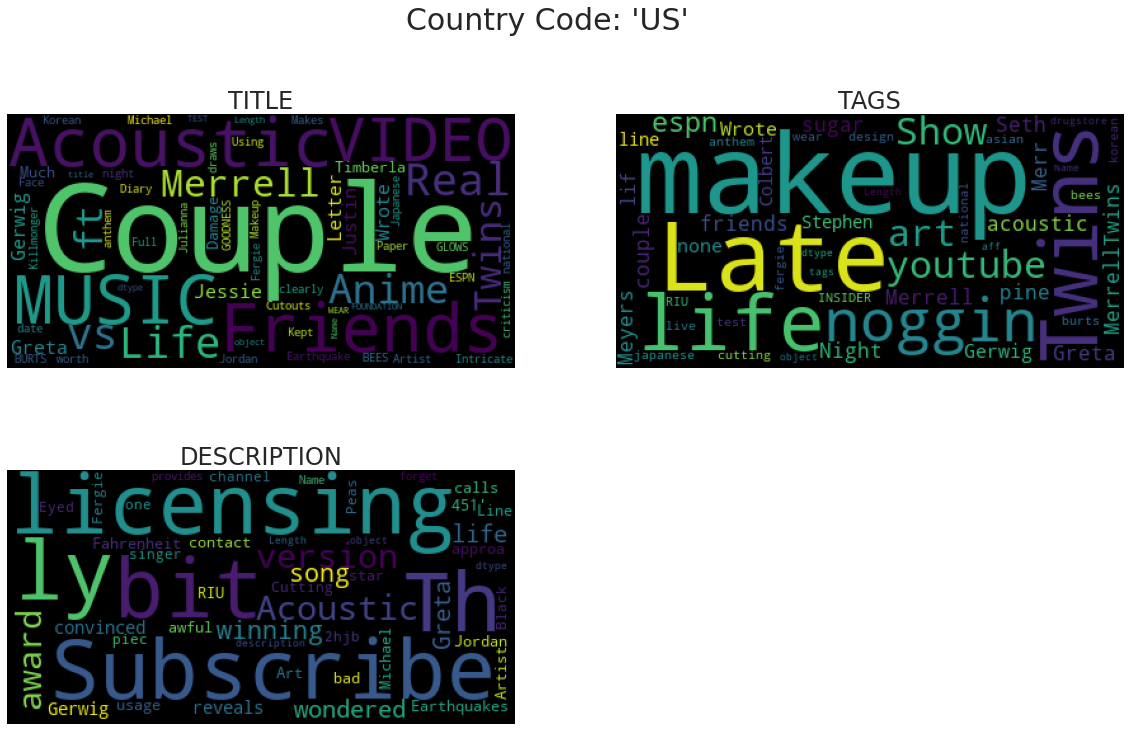

In [130]:
plot_countrywise(country_code='US')

- Descriptive Videos get more number of likes than other videos with short descriptions
- Short Titles are preferred too

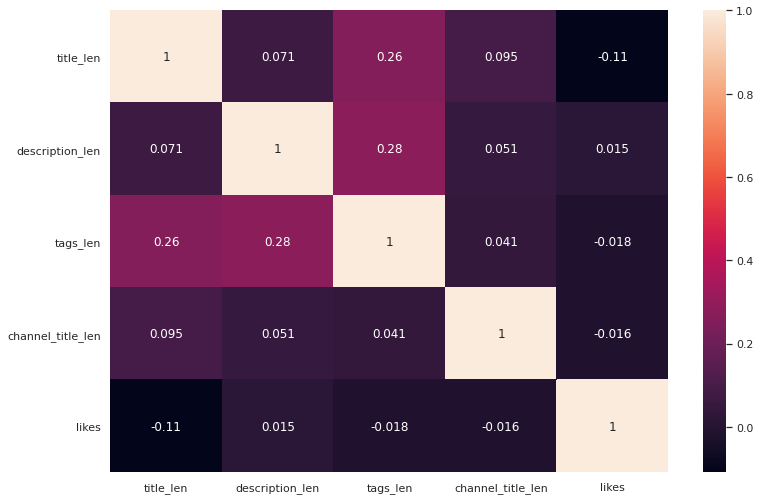

In [131]:
train['title_len'] = train['title'].apply(lambda x: len(x))
train['description_len'] = train['description'].apply(lambda x: len(x))
train['tags_len'] = train['tags'].apply(lambda x: len(x))
train['channel_title_len'] = train['channel_title'].apply(lambda x: len(x))

_  = sns.heatmap(train[['title_len', 'description_len', 'tags_len', 'channel_title_len', 'likes']].corr(), annot = True)

In [209]:
from nltk.corpus import stopwords
def tags_phrases(raw_tags):
    phrases = raw_tags.lower().split('|')
    stops = set(STOPWORDS)
    meaningful_words = [w for w in phrases if not w in stops]
    return(",".join(meaningful_words))
clean_tags = []
for key in data['tags']:
    clean_tags.append(tags_phrases(key))
print(clean_tags[1])
print(len(clean_tags))

abs-cbn entertainment,"abs-cbn","abs-cbn online","abs online","abs-cbn program","entertainment","showbiz news","philippines","philippine entertainment","abs-cbn philippines","showbiz","online","it's showtime highlights","madlang people","variety","noontime show","vice ganda","anne curtis","amy perez","billy crawford","jhong hilario","hashtags","girltrends","ryan bang","it's showtime","march 8 2018","20180308online","#showtimegirlsruntheworld","bela padilla","miss q and a","jackque gonzaga"
37231


In [213]:
data['tags']

(37231, 16)

# Modelling and Evaluation

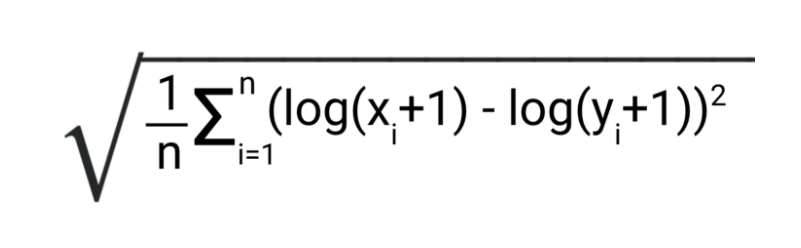

The Robustness of RMSLE to the outliers, the property of calculating the relative error between the Predicted and Actual Values, the most unique property of the RMLSE that it penalizes the underestimation of the actual value more severely than it does for the Overestimation.



In [192]:
final_train = data[data['source']=='train']
final_test = data[data['source']=='test']
id_video = final_test['video_id']


views  dislikes  comment_count      likes
0      12.769769  5.700444       6.803505   7.763021
1      13.042257  4.317488       5.752573   8.091015
2      10.601772  5.017280       4.615121   6.364751
3      13.141631  6.742881       8.420021  11.323869
4      11.216028  4.248495       5.087596   8.176954
...          ...       ...            ...        ...
26056  11.550732  4.488636       6.753438   8.889722
26057  11.036034  3.988984       5.393628   7.292337
26058  14.240617  7.400621       7.671827  10.603685
26059  12.132754  4.521789       6.401917   8.354204
26060  11.933608  5.170484       5.627621   7.712891

[26061 rows x 4 columns]

In [193]:
X = final_train.drop(columns=['likes'], axis=1)
y = final_train['likes']

In [194]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error

def rmsle(y_true, y_pred):
  return np.sqrt(mean_squared_log_error(y_true, y_pred))

def av_metric(y_true, y_pred):
  return 1000 * np.sqrt(mean_squared_error(y_true, y_pred))

target = train['likes']

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [236]:
xgb = LGBMRegressor(n_estimators=60, learning_rate=0.05,
                   colsample_bytree=0.76, max_depth=10)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
rmsle(y_test, y_pred)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=0.76,
              importance_type='split', learning_rate=0.05, max_depth=10,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=60, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

0.10940047128779382

In [237]:
av_metric(y_test, y_pred)

799.9849175485608

In [199]:
final_test

views  dislikes  comment_count
26061  11.299658  4.007333       4.382027
26062  11.920508  5.442418       5.743003
26063   8.788593  2.397895       2.079442
26064  11.403836  4.983607       5.783825
26065  10.887941  5.880533       5.036953
...          ...       ...            ...
37226  12.588811  5.638355       4.820282
37227  11.908663  4.762174       6.761573
37228  11.836870  5.017280       7.339538
37229  13.839277  8.074960       6.981006
37230  11.905447  5.241747       6.841615

[11170 rows x 3 columns]

In [220]:
sample = pd.read_csv("data/sample.csv")
preds = xgb.predict(final_test)
preds = np.exp(preds)
x = pd.DataFrame({'video_id':id_video, 'likes':preds})
x

video_id         likes
26061     87185    570.430705
26062      9431   2329.857577
26063     40599     71.799496
26064       494   2034.210841
26065     73942    777.226175
...         ...           ...
37226     19415   1541.953142
37227     25168   4260.922722
37228     80293   5246.289515
37229     80880  14513.305048
37230      6514   4541.590763

[11170 rows x 2 columns]

In [221]:
x.to_csv("lgbm.csv", index=False)

In [189]:
sample.to_csv('first.csv', index=False)

In [161]:
data = data.drop(columns=['title_length'], axis=1)

In [162]:
def title_length(x):
    return len(x)
data['channel_length'] = data['channel_title'].apply(title_length)
data

index  video_id                                              title  \
0          0     53364  Alif Allah Aur Insaan Episode 34 HUM TV Drama ...   
1          1     51040  It's Showtime Miss Q & A: Bela gets jealous of...   
2          2      1856  ದರ್ಶನ್ ಗೆ ಬಾರಿ ಅವಮಾನ ಮಾಡಿದ ಶಿವಣ್ಣ ನಾಯಕಿ \n  ಕ್...   
3          3     22618       Havana - swing cover | dodie feat. FLASHBACK   
4          4     74074  MUMMY NE NI KEHTA - 2  FT. 102 NOT OUT| DUDE S...   
...      ...       ...                                                ...   
37226  11165     19415  Tapu Sena's Summer Vacation | Tapu Sena Specia...   
37227  11166     25168        Senselet Drama S02 EP43 ሰንሰለት ምዕራፍ 2 ክፍል 43   
37228  11167     80293           Being Woman | Girl Formula | Chai Bisket   
37229  11168     80880                  Deivamagal Episode 1455, 05/02/18   
37230  11169      6514  They Are Doing Things That Should Truly Scare You   

               channel_title  category_id publish_date  \
0                     HUM TV         24.0   2017-12-12   
1      ABS-CBN Entertainment         24.0   2018-03-08   
2         SANDALWOOD REVIEWS         24.0   2018-03-26   
3                doddleoddle         10.0   2018-02-21   
4             Dude Seriously         23.0   2018-05-10   
...                      ...          ...          ...   
37226                 SAB TV         24.0   2018-03-30   
37227         Senselet Drama          1.0   2018-04-28   
37228           Girl Formula         24.0   2018-03-08   
37229              VikatanTV         43.0   2018-02-05   
37230                 Amplex         24.0   2018-03-08   

                                                    tags      views  dislikes  \
0      HUM|"TV"|"Alif Allah Aur Insaan"|"Episode 34"|...  12.769769  5.700444   
1      ABS-CBN Entertainment|"ABS-CBN"|"ABS-CBN Onlin...  13.042257  4.317488   
2      challenging star darshan latest news|"challeng...  10.601772  5.017280   
3      havana|"cover"|"a capella"|"swing"|"dodie"|"fl...  13.141631  6.742881   
4      dude|"seriously"|"friends"|"fun"|"gujarati"|"h...  11.216028  4.248495   
...                                                  ...        ...       ...   
37226  tapu sena special|"tapu special clips"|"taarak...  12.588811  5.638355   
37227  Senselet|"Senselet part 43"|"senselet 43"|"Zem...  11.908663  4.762174   
37228  girl formula|"short film"|"telugu"|"telugu fun...  11.836870  5.017280   
37229  deivamagal|"deiva magal"|"deiva magal serial"|...  13.839277  8.074960   
37230  educational|"secrets"|"hidden"|"truth"|"myster...  11.905447  5.241747   

       comment_count                                        description  \
0           6.803505  Alif Allah Aur Insaan Episode 34 Full - 12 Dec...   
1           5.752573  Vice Ganda notices Bela Padilla's sudden chang...   
2           4.615121  ದರ್ಶನ್ ಗೆ ಬಾರಿ ಅವಮಾನ ಮಾಡಿದ ಶಿವಣ್ಣ ನಾಯಕಿ    ಕ್ಲ...   
3           8.420021  Hi hi hi! here's our vid on FLASHBACK's channe...   
4           5.087596  BOOK YOUR TICKETS HERE:  https://goo.gl/QxdSyg...   
...              ...                                                ...   
37226       4.820282  Click here to Subscribe to SAB TV Channel : ht...   
37227       6.761573  ድርሰት: ተመስገን አፈወርቅ\nአዘጋጆች: ቴዎድሮስ ለገሰ ብዙ እና ተመስገ...   
37228       7.339538  Don't put her on a pedestal. Don't shame her f...   
37229       6.981006  Deivamagal Episode 1455\nSubscribe: https://go...   
37230       6.841615  ➨Check Out our Online Store: https://amplex-li...   

      country_code      likes source  day  channel_length  
0               CA   7.763021  train    1               6  
1               CA   8.091015  train    3              21  
2               IN   6.364751  train    0              18  
3               GB  11.323869  train    2              11  
4               IN   8.176954  train    3              14  
...            ...        ...    ...  ...             ...  
37226           IN        NaN   test    4               6  
37227           CA        NaN  

In [143]:
preds_target = pd.Series([target.mean()] * len(train))

av_metric_score = av_metric(target, preds_target)

print(f'AV metric score is: {av_metric_score}')

AV metric score is: 58562.43019554849
